# Language Learning Hybrid Chatbot



## NLP
NLP is a way for computers to analyze, understand, and derive meaning from human language in a smart and useful way. By utilizing NLP, developers can organize and structure knowledge to perform tasks such as automatic summarization, translation, named entity recognition, relationship extraction, sentiment analysis, speech recognition, and topic segmentation.

## Import necessary libraries

In [15]:
import json
import string
import random
import pandas as pd

import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Downloading and installing NLTK
NLTK(Natural Language Toolkit) is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

[Natural Language Processing with Python](http://www.nltk.org/book/) provides a practical introduction to programming for language processing.

For platform-specific instructions, read [here](https://www.nltk.org/install.html)



In [16]:
pip install nltk


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Muhammad Daffa A B\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Installing NLTK Packages




In [17]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True) # for downloading packages
#nltk.download('punkt') # first-time use only
#nltk.download('wordnet') # first-time use only

True

## Reading in the corpus

For our example,we will be using the Wikipedia page for Hiragana and Katakana as our corpus. Copy the contents from the page and place it in a text file.

In [18]:
data = pd.read_json("./intents_exercise.json")
data

,intents
0,"{'tag': 'katakanaDefinition', 'patterns': ['Wh..."
1,"{'tag': 'hiraganaDefinition', 'patterns': ['Wh..."
2,"{'tag': 'katakanaExamples', 'patterns': ['Show..."
3,"{'tag': 'hiraganaExamples', 'patterns': ['Show..."
4,"{'tag': 'katakanaUsage', 'patterns': ['When to..."
...,...
58,"{'tag': 'katakanaComprehensionChallenges', 'pa..."
59,"{'tag': 'katakanaAndLanguageDevelopment', 'pat..."
60,"{'tag': 'katakanaProcessingEfficiency', 'patte..."
61,"{'tag': 'katakanaAndMentalMapping', 'patterns'..."


In [19]:
words = []
classes = []
data_X = []
data_Y = []

for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern)
        words.extend(tokens)
        data_X.append(pattern)
        data_Y.append(intent["tag"]) ,

    if intent["tag"] not in classes:
        classes.append(intent["tag"])

lemmatizer = WordNetLemmatizer()

words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]

words = sorted(set(words))
classes = sorted(set(classes))
words

["'s",
 'and',
 'are',
 'art',
 'between',
 'book',
 'calligraphy',
 'challenge',
 'character',
 'child',
 'cognitive',
 'combination',
 'compared',
 'comprehension',
 'conjugation',
 'contribute',
 'cultural',
 'culture',
 'custom',
 'development',
 'difference',
 'difficulty',
 'do',
 'doe',
 'education',
 'efficiency',
 'efficiently',
 'emphasis',
 'emphasized',
 'emphasizing',
 'enhance',
 'evolution',
 'example',
 'face',
 'fast',
 'for',
 'foreign',
 'game',
 'genre',
 'hiragana',
 'hiragana-only',
 'historical',
 'how',
 'impact',
 'in',
 'influence',
 'is',
 'japanese',
 'kanji',
 'katakana',
 'language',
 'list',
 'literary',
 'literature',
 'load',
 'loanword',
 'map',
 'mapping',
 'me',
 'meaning',
 'medium',
 'mental',
 'mentally',
 'modern',
 'much',
 'name',
 'native',
 'no',
 'of',
 'on',
 'onomatopoeia',
 'origin',
 'other',
 'particle',
 'perceive',
 'perception',
 'poetry',
 'popular',
 'practice',
 'process',
 'processing',
 'read',
 'reading',
 'role',
 'script',
 '

In [20]:
training = []
out_empty = [0] * len(classes)

for idx, doc in enumerate(data_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
        output_row = list(out_empty)
        output_row[classes.index(data_Y[idx])] = 1
        training.append([bow, output_row])

random.shuffle(training)
training = np.array(training, dtype=object)

train_X = np.array(list(training[:, 0]))
train_Y = np.array(list(training[:, 1]))


In [21]:
# Define FNN Model (Only consists of dense layers)
fnn_model = Sequential()
fnn_model.add(Dense(128, input_shape=(len(train_X[0]),), activation="relu")) # Number of neurons
fnn_model.add(Dropout(0.5))
fnn_model.add(Dense(64, activation="relu"))
fnn_model.add(Dropout(0.5))
fnn_model.add(Dense(len(train_Y[0]), activation="softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
fnn_model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

# Train FNN Model (doesn't need any reshaping)
fnn_history = fnn_model.fit(x=train_X, y=train_Y, epochs=10, verbose=1)
print(fnn_model.summary())





Epoch 1/10
432/432 [==============================] - 1s 2ms/step - loss: 0.9798 - accuracy: 0.7145
Epoch 2/10
432/432 [==============================] - 1s 2ms/step - loss: 0.4107 - accuracy: 0.8692
Epoch 3/10
432/432 [==============================] - 1s 2ms/step - loss: 0.3892 - accuracy: 0.8819
Epoch 4/10
432/432 [==============================] - 1s 2ms/step - loss: 0.4040 - accuracy: 0.8814
Epoch 5/10
432/432 [==============================] - 1s 1ms/step - loss: 0.3728 - accuracy: 0.8952
Epoch 6/10
432/432 [==============================] - 1s 2ms/step - loss: 0.3777 - accuracy: 0.8957
Epoch 7/10
432/432 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8986
Epoch 8/10
432/432 [==============================] - 1s 2ms/step - loss: 0.3723 - accuracy: 0.8993
Epoch 9/10
432/432 [==============================] - 1s 2ms/step - loss: 0.3951 - accuracy: 0.8988
Epoch 10/10
432/432 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.9101

In [22]:
# Define LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(len(train_X[0]), 1))) # Number of neurons
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(64, activation="relu"))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(len(train_Y[0]), activation="softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
lstm_model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

# Train LSTM Model (reshape input for LSTM)
train_X_lstm = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
lstm_history = lstm_model.fit(x=train_X_lstm, y=train_Y, epochs=10, verbose=1)
print(lstm_model.summary())


Epoch 1/10
432/432 [==============================] - 23s 50ms/step - loss: 3.1298 - accuracy: 0.1404
Epoch 2/10
432/432 [==============================] - 21s 49ms/step - loss: 2.1658 - accuracy: 0.2734
Epoch 3/10
432/432 [==============================] - 24s 56ms/step - loss: 1.9401 - accuracy: 0.3246
Epoch 4/10
432/432 [==============================] - 24s 56ms/step - loss: 1.7726 - accuracy: 0.3545
Epoch 5/10
432/432 [==============================] - 24s 56ms/step - loss: 1.6238 - accuracy: 0.3757
Epoch 6/10
432/432 [==============================] - 23s 53ms/step - loss: 1.4176 - accuracy: 0.4288
Epoch 7/10
432/432 [==============================] - 23s 54ms/step - loss: 1.2847 - accuracy: 0.4633
Epoch 8/10
432/432 [==============================] - 24s 56ms/step - loss: 1.3903 - accuracy: 0.4505
Epoch 9/10
432/432 [==============================] - 22s 51ms/step - loss: 1.1475 - accuracy: 0.5009
Epoch 10/10
432/432 [==============================] - 24s 55ms/step - loss: 1.079

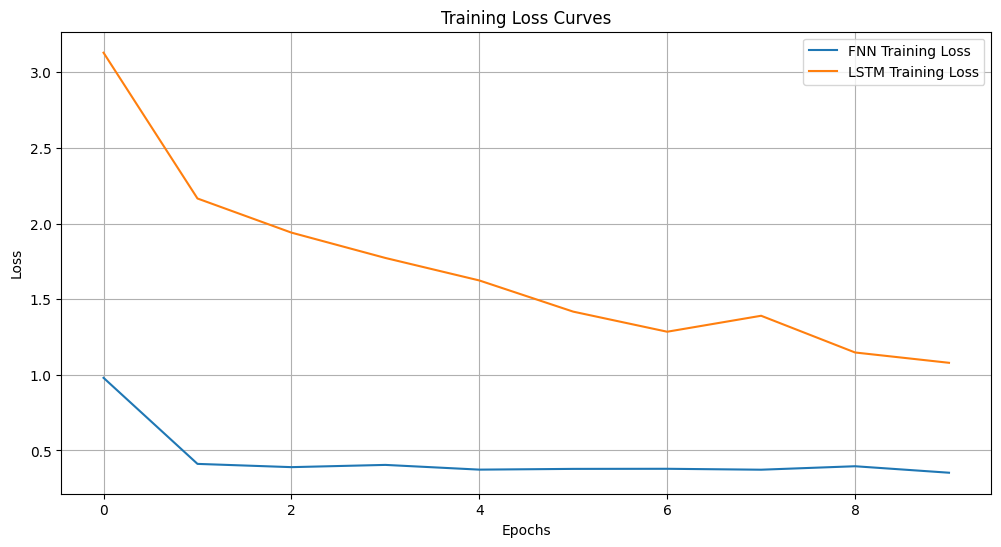

In [23]:
# Visualize Training and Validation Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(fnn_history.history["loss"], label="FNN Training Loss")
plt.plot(lstm_history.history["loss"], label="LSTM Training Loss")
plt.title("Training Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

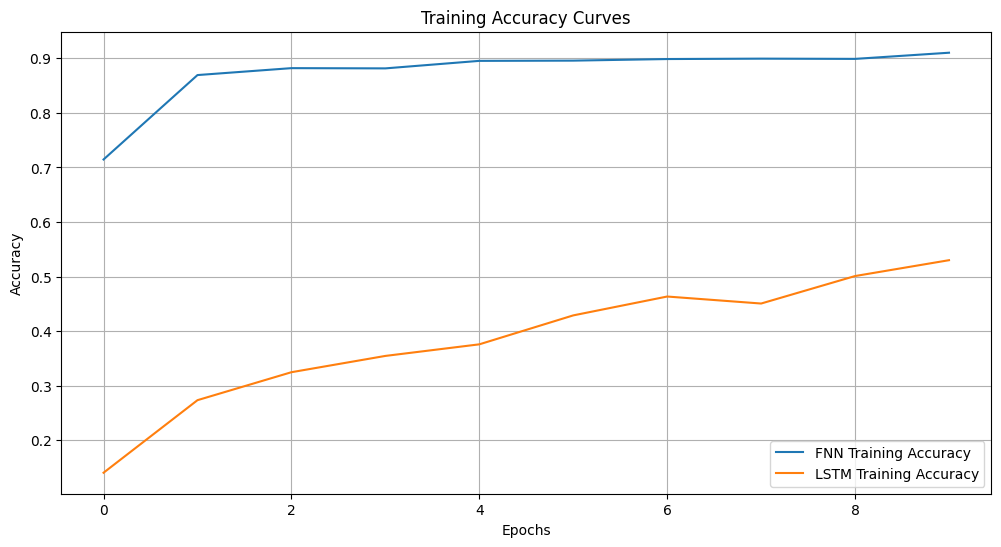

In [24]:
# Visualize Training and Validation Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(fnn_history.history["accuracy"], label="FNN Training Accuracy")
plt.plot(lstm_history.history["accuracy"], label="LSTM Training Accuracy")
plt.title("Training Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Finally, we will feed the lines that we want our bot to say while starting and ending a conversation depending upon user’s input.